In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb


In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.shape

(284807, 31)

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [44]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [45]:
df.duplicated().sum()

np.int64(1081)

In [46]:
df.drop_duplicates(inplace=True)

Class
0    283253
1       473
Name: count, dtype: int64


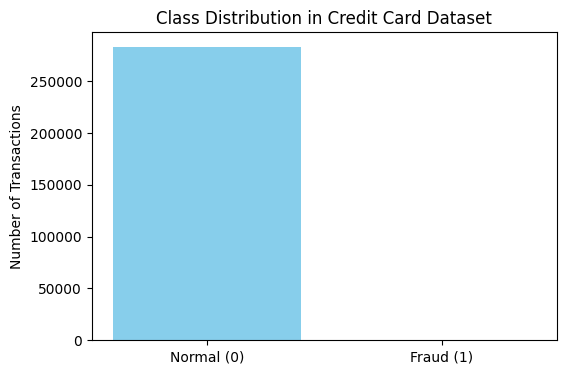

In [47]:

# Count of each class
class_counts = df["Class"].value_counts()
print(class_counts)

# Simple bar plot using Matplotlib
plt.figure(figsize=(6,4))
plt.bar(class_counts.index.astype(str), class_counts.values, color=['skyblue', 'salmon'])
plt.xticks([0,1], ['Normal (0)', 'Fraud (1)'])
plt.ylabel('Number of Transactions')
plt.title('Class Distribution in Credit Card Dataset')
plt.show()



C:\Users\Friedrich\AppData\Local\Temp\ipykernel_29028\1539629645.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = df.groupby('Amount_bin')['Class'].mean().reset_index()


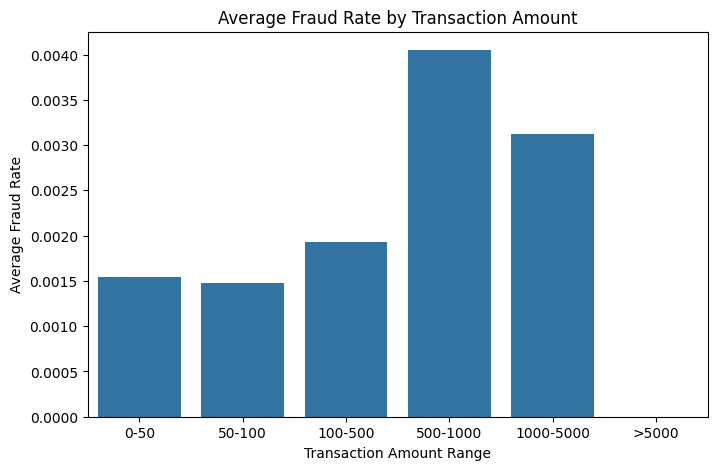

In [50]:
# Create bins for the Amount to make the chart readable
bins = [0, 50, 100, 500, 1000, 5000, df["Amount"].max()]
labels = ['0-50', '50-100', '100-500', '500-1000', '1000-5000', '>5000']
df['Amount_bin'] = pd.cut(df['Amount'], bins=bins, labels=labels, include_lowest=True)
# Calculate average fraud rate per bin
fraud_rate = df.groupby('Amount_bin')['Class'].mean().reset_index()

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='Amount_bin', y='Class', data=fraud_rate)
plt.xlabel('Transaction Amount Range')
plt.ylabel('Average Fraud Rate')
plt.title('Average Fraud Rate by Transaction Amount')
plt.show()

### Do fraudulent transactions have higher average amounts than legitimate ones?

In [ ]:
avg_amount_by_class=df.groupby("Class")["Amount"].mean().reset_index()
avg_amount_by_class

"""
yes fraudulent transactions have a higher amount than non-fraudulant transactions
"""

,Class,Amount
0,0,88.413575
1,1,123.871860


### Which PCA column has the highest correlation with fraud?

In [ ]:
df.drop(columns=["Amount_bin"], inplace=True)
# Compute correlation of all features with Class
correlations = df.corr()["Class"].sort_values(ascending=False)

# Display correlations
print(correlations)

"""
V11 and V4 seem to have the highest correlation
"""

Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
V22       0.004887
V26       0.004265
V25       0.003202
V15      -0.003300
V13      -0.003897
V23      -0.006333
V24      -0.007210
Time     -0.012359
V6       -0.043915
V5       -0.087812
V9       -0.094021
V1       -0.094486
V18      -0.105340
V7       -0.172347
V3       -0.182322
V16      -0.187186
V10      -0.206971
V12      -0.250711
V14      -0.293375
V17      -0.313498
Name: Class, dtype: float64


In [6]:
X = df.drop("Class", axis=1)
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Undersampling

In [7]:
rus = RandomUnderSampler(random_state=42)

X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

print("Before:", np.bincount(y_train))
print("After undersampling:", np.bincount(y_train_rus))

Before: [227451    394]
After undersampling: [394 394]


c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [ ]:
rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42
)

rf.fit(X_train_rus, y_train_rus)
rf_pred = rf.predict(X_test)
# Predict class probabilities (positive class = 1)
rf_probs = rf.predict_proba(X_test)[:,1]



In [ ]:
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train_rus, y_train_rus)
# Predict class probabilities (positive class = 1)
xgb_probs = xgb_model.predict_proba(X_test)[:,1]
xgb_pred = (xgb_probs > 0.5).astype(int)

In [10]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"\n===== {name} =====")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

In [11]:
evaluate_model("Random Forest (Undersampling)", y_test, rf_pred, rf_probs)
evaluate_model("XGBoost (Undersampling)", y_test, xgb_pred, xgb_probs)



===== Random Forest (Undersampling) =====
[[54907  1957]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.92      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.97      0.98     56962


===== XGBoost (Undersampling) =====
[[54588  2276]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
"""
Row 1 (Actual 0):
    54,907 normal correctly predicted
    1,957 normal incorrectly predicted as fraud (false positives)

Row 2 (Actual 1):
    8 fraud missed (false negatives)
    90 fraud correctly detected (true positives)

What this means:

-> Recall for fraud = 90 / 98 = 0.92 -> good
-> Precision for fraud is very low (0.04) because many normal transactions were flagged as fraud.
"""

'\nRow 1 (Actual 0):\n    54,907 normal correctly predicted\n    1,957 normal incorrectly predicted as fraud (false positives)\n\nRow 2 (Actual 1):\n    8 fraud missed (false negatives)\n    90 fraud correctly detected (true positives)\n\nWhat this means:\n\n✔ Recall for fraud = 90 / 98 = 0.92 → EXCELLENT\n✖ Precision for fraud is very low (0.04) because many normal transactions were flagged as fraud.\n'

## Oversampling

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE:", np.bincount(y_train_sm))



c:\Users\Friedrich\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Before SMOTE: [227451    394]
After SMOTE: [227451 227451]


In [15]:
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=25,
    max_features='sqrt',
    n_jobs=-1,
    random_state=42
)

# Train on oversampled data
rf.fit(X_train_sm, y_train_sm)

# Predict class labels
rf_pred_sm = rf.predict(X_test)

# Predict class probabilities (positive class = 1)
rf_probs_sm = rf.predict_proba(X_test)[:, 1]

In [30]:
xgb_model_sm = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=25,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb_model_sm.fit(X_train_sm, y_train_sm)
xgb_probs_sm = xgb_model_sm.predict_proba(X_test)[:,1]
xgb_pred_sm = (xgb_probs > 0.5).astype(int)

In [31]:
evaluate_model("Random Forest (SMOTE)", y_test, rf_pred_sm, rf_probs_sm)
evaluate_model("XGBoost (SMOTE)", y_test, xgb_pred_sm, xgb_probs_sm)



===== Random Forest (SMOTE) =====
[[56844    20]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962


===== XGBoost (SMOTE) =====
[[54588  2276]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.92      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
"""
Row 1 (Actual 0 -> non-fraud):
56,844 correctly predicted as normal (True Negatives, TN)
20 incorrectly flagged as fraud (False Positives, FP)

Row 2 (Actual 1 -> fraud):
18 fraud missed (False Negatives, FN)
80 correctly detected (True Positives, TP)

Precision 0.80 -> only 20% of alerts are false alarms.
    Much better than pure undersampling (which had precision ~0.04).
Recall 0.82 -> model detects most fraud cases.


XGBoost didn't improve -> unclear why

"""